## **PREPROCESSING**


In [1]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

id_train = '1kplz4uDcImLvOqH7DzgviUv8_8zsnsF0'
downloaded = drive.CreateFile({'id': id_train})
downloaded.GetContentFile('Training Data.csv')

In [3]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.19.5
pandas version :  1.1.5
seaborn version :  0.11.2


In [4]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

### **LOAD & DESCRIBE DATA**

#### Load Data

In [5]:
df = pd.read_csv('Training Data.csv')
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


- Data setiap kolom lengkap.
- Tipe data sesuai dengan isi kolomnya.

In [7]:
# menyeragamkan penulisan nama kolom dan isinya

df.columns = ['id', 'income', 'age', 'experience', 'marital_status', 'house_ownership', 'car_ownership', 'profession', 'city', 'state', 'current_job_yrs', 'current_house_yrs', 'risk_flag']
df['profession'] = df['profession'].str.replace('_', ' ').str.lower()
df['state'] = df['state'].str.replace('_', ' ').str.lower()
df['city'] = df['city'].str.lower()
df.head(10)

,id,income,age,experience,marital_status,house_ownership,car_ownership,profession,city,state,current_job_yrs,current_house_yrs,risk_flag
0,1,1303834,23,3,single,rented,no,mechanical engineer,rewa,madhya pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,software developer,parbhani,maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,technical writer,alappuzha,kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,software developer,bhubaneswar,odisha,2,12,1
4,5,5768871,47,11,single,rented,no,civil servant,tiruchirappalli[10],tamil nadu,3,14,1
5,6,6915937,64,0,single,rented,no,civil servant,jalgaon,maharashtra,0,12,0
6,7,3954973,58,14,married,rented,no,librarian,tiruppur,tamil nadu,8,12,0
7,8,1706172,33,2,single,rented,no,economist,jamnagar,gujarat,2,14,0
8,9,7566849,24,17,single,rented,yes,flight attendant,kota[6],rajasthan,11,11,0
9,10,8964846,23,12,single,rented,no,architect,karimnagar,telangana,5,13,0


#### Describe Data

In [8]:
cats = df.select_dtypes(include=['object'])
nums = df.select_dtypes(include=['int64'])

In [9]:
nums.describe()

,id,income,age,experience,current_job_yrs,current_house_yrs,risk_flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


- Tidak ada nilai yang tidak wajar di masing-masing kolom (dicurigai no outlier).
- Nilai mean & median untuk tiap kolom nyaris sama persis (di satu titik pada sumbu x, dicurigai semuanya berdistribusi normal).

In [10]:
cats.describe()

,marital_status,house_ownership,car_ownership,profession,city,state
count,252000,252000,252000,252000,252000,252000
unique,2,3,2,51,317,29
top,single,rented,no,physician,vijayanagaram,uttar pradesh
freq,226272,231898,176000,5957,1259,28400


- Kolom 'profession', 'city', dan 'state' memiliki terlalu banyak unique value (dicurigai tidak berpengaruh atau tidak bisa memberikan meaningful insight, kemungkinan di drop).
- Proporsi untuk tiap unique value pada masing-masing kolom 'marital_status', 'house_ownership', dan 'car_ownership' sangat timpang.

### **DATA CLEANSING**

#### Missing Value

In [11]:
df.isna().sum()

id                   0
income               0
age                  0
experience           0
marital_status       0
house_ownership      0
car_ownership        0
profession           0
city                 0
state                0
current_job_yrs      0
current_house_yrs    0
risk_flag            0
dtype: int64

- Seperti hasil df.info() sebelumnya, data semua kolom lengkap alias tidak ada baris dengan nilai null (tidak perlu drop atau imputasi nilai).

#### Duplicate Value

In [12]:
df.duplicated().sum()

0

In [13]:
x = df.duplicated(subset=['income', 'age', 'experience', 'marital_status', 'house_ownership', 'car_ownership', 'profession'])
df[x==True].count()

id                   209993
income               209993
age                  209993
experience           209993
marital_status       209993
house_ownership      209993
car_ownership        209993
profession           209993
city                 209993
state                209993
current_job_yrs      209993
current_house_yrs    209993
risk_flag            209993
dtype: int64

In [14]:
df[x==True]

,id,income,age,experience,marital_status,house_ownership,car_ownership,profession,city,state,current_job_yrs,current_house_yrs,risk_flag
5366,5367,7574516,40,10,single,rented,no,software developer,parbhani,maharashtra,9,13,0
5367,5368,3991815,66,4,married,rented,no,technical writer,alappuzha,kerala,4,10,0
5368,5369,6256451,41,2,single,rented,yes,software developer,bhubaneswar,odisha,2,12,1
5369,5370,5768871,47,11,single,rented,no,civil servant,tiruchirappalli[10],tamil nadu,3,14,0
5370,5371,6915937,64,0,single,rented,no,civil servant,jalgaon,maharashtra,0,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
215992,215993,9482746,68,10,single,rented,no,physician,indore,madhya pradesh,6,11,1
215993,215994,4590372,42,16,single,rented,no,hotel manager,shahjahanpur,uttar pradesh,7,11,0
215994,215995,4727841,52,8,single,rented,no,technology specialist,tenali,andhra pradesh,8,12,0
215995,215996,5000063,38,17,single,rented,no,technology specialist,yamunanagar,haryana,5,11,1


In [15]:
df[df['income']==7574516]

,id,income,age,experience,marital_status,house_ownership,car_ownership,profession,city,state,current_job_yrs,current_house_yrs,risk_flag
1,2,7574516,40,10,single,rented,no,software developer,parbhani,maharashtra,9,13,0
5366,5367,7574516,40,10,single,rented,no,software developer,parbhani,maharashtra,9,13,0
10744,10745,7574516,40,10,single,rented,no,software developer,parbhani,maharashtra,9,13,0
16165,16166,7574516,40,10,single,rented,no,software developer,parbhani,maharashtra,9,13,0
21521,21522,7574516,40,10,single,rented,no,software developer,parbhani,maharashtra,9,13,0
32307,32308,7574516,40,10,single,rented,no,software developer,parbhani,maharashtra,9,13,0
37701,37702,7574516,40,10,single,rented,no,software developer,parbhani,maharashtra,9,13,0
43121,43122,7574516,40,10,single,rented,no,software developer,parbhani,maharashtra,9,13,0
48507,48508,7574516,40,10,single,rented,no,software developer,parbhani,maharashtra,9,13,0
53924,53925,7574516,40,10,single,rented,no,software developer,parbhani,maharashtra,9,13,0


In [16]:
df2 = df.drop_duplicates(subset=['income', 'age', 'experience', 'marital_status', 'house_ownership', 'car_ownership', 'profession'], keep='first')
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42007 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 42007 non-null  int64 
 1   income             42007 non-null  int64 
 2   age                42007 non-null  int64 
 3   experience         42007 non-null  int64 
 4   marital_status     42007 non-null  object
 5   house_ownership    42007 non-null  object
 6   car_ownership      42007 non-null  object
 7   profession         42007 non-null  object
 8   city               42007 non-null  object
 9   state              42007 non-null  object
 10  current_job_yrs    42007 non-null  int64 
 11  current_house_yrs  42007 non-null  int64 
 12  risk_flag          42007 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 4.5+ MB


#### Outliers

In [17]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df2)}')

filtered_entries = np.array([True] * len(df2))
for col in ['age', 'income']:
    Q1 = df2[col].quantile(0.25)
    Q3 = df2[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df2[col] >= low_limit) & (df2[col] <= high_limit)) & filtered_entries
    
df2 = df2[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df2)}')

Jumlah baris sebelum memfilter outlier: 42007
Jumlah baris setelah memfilter outlier: 42007


- Seperti hasil nums.describe(), tidak ditemukan adanya outlier, baik secara keseluruhan maupun subset kolom numerical.

### **NORMALIZATION/STANDARDIZATION**

In [18]:
df3 = df2.copy()
df3.describe()

,id,income,age,experience,current_job_yrs,current_house_yrs,risk_flag
count,42007.000000,4.200700e+04,42007.000000,42007.000000,42007.000000,42007.000000,42007.000000
mean,201027.539291,5.000524e+06,49.917561,9.979432,6.296546,12.007285,0.197229
std,81317.303210,2.881826e+06,17.056947,6.037260,3.662397,1.413117,0.397911
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,220495.500000,2.514768e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,230997.000000,4.986210e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,241498.500000,7.493146e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


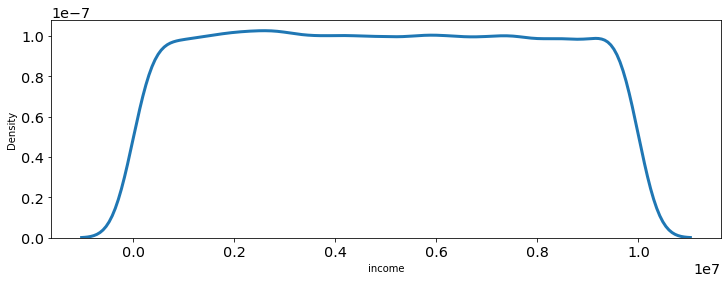

In [19]:
sns.kdeplot(df3['income'])
plt.show()

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
df3['income_norm'] = MinMaxScaler().fit_transform(df3['income'].values.reshape(len(df3), 1))
df3[['income_norm', 'income']].head()

,income_norm,income
0,0.129487,1303834
1,0.757206,7574516
2,0.398564,3991815
3,0.625263,6256451
4,0.576454,5768871


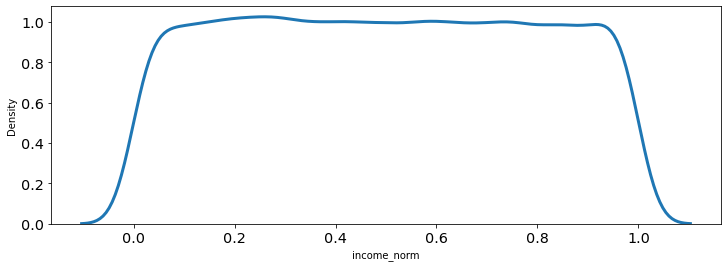

In [22]:
sns.kdeplot(df3['income_norm'])
plt.show()

- Data yang di-scaling hanya pada kolom 'income' karena memiliki range nilai paling besar di antara yang lain.
- Untuk scaling, tidak masalah akan menggunakan metode MinMaxScaler() atau StandardScaler() karena data cenderung berdistribusi normal dan tidak memiliki outlier.

### **FEATURE ENCODING**

In [23]:
from sklearn.preprocessing import LabelEncoder
from collections import Counter

In [93]:
df4 = df3.copy()

print('Unique value untuk kolom profesi sejumlah', df4['profession'].nunique())
print('Unique value untuk kolom state sejumlah', df4['state'].nunique())

Unique value untuk kolom profesi sejumlah 51
Unique value untuk kolom state sejumlah 29


#### Kolom 'state': Threshold frekuensi per unique value

In [94]:
threshold = 0.05
threshold_value=int(threshold * len(df4['state']))
categories_list = []                          
s=0                                         
counts=Counter(df4['state'])                      

for i,j in counts.most_common():
    s = dict(counts)[i]                                        
    if s>=threshold_value:
      categories_list.append(i)                    
    else:
      categories_list.append('other')

df4['state']=df4['state'].apply(lambda x: x if x in categories_list else 'other')

In [95]:
df4['state'].describe()

count     42007
unique        8
top       other
freq      16579
Name: state, dtype: object

In [96]:
df4['state'].unique()

array(['madhya pradesh', 'maharashtra', 'other', 'tamil nadu', 'bihar',
       'andhra pradesh', 'west bengal', 'uttar pradesh'], dtype=object)

#### Kolom 'profession': Pengerucutan per jenis industri

In [97]:
government = ['official', 'civil servant']
military_and_police = ['police officer', 'army officer']
health = ['surgeon', 'dentist', 'physician', 'psychologist']
law_social_culture = ['designer', 'politician', 'comedian', 'economist', 'librarian', 'artist', 'lawyer', 'magistrate', 'technical writer']
science_engineering = ['technician', 'scientist', 'engineer', 'civil engineer', 'petroleum engineer', 'biomedical engineer', 'chemical engineer', 'industrial engineer', 'mechanical engineer', 'design engineer', 'computer hardware engineer', 'consultant', 'technology specialist', 'architect', 'surveyor', 'drafter', 'statistician', 'microbiologist', 'fashion designer', 'web designer', 'graphic designer', 'geologist']
assistant_science_engineering = ['aviator', 'air traffic controller']
individual_business_personnel = ['analyst', 'chef', 'flight attendant']
business_administration = ['financial analyst', 'chartered accountant']
information_communication_technology = ['software developer', 'computer operator']
#administrative_personnel = ['secretary']
#protection_service_worker = ['firefighter']
#manager_hospitality_trade_other = ['hotel manager']

In [98]:
df4['profession'] = df4['profession'].apply(lambda x: 'government' if x in government else x)
df4['profession'] = df4['profession'].apply(lambda x: 'military_and_police' if x in military_and_police else x)
df4['profession'] = df4['profession'].apply(lambda x: 'health' if x in health else x)
df4['profession'] = df4['profession'].apply(lambda x: 'law_social_culture' if x in law_social_culture else x)
df4['profession'] = df4['profession'].apply(lambda x: 'science_engineering' if x in science_engineering else x)
df4['profession'] = df4['profession'].apply(lambda x: 'assistant_science_engineering' if x in assistant_science_engineering else x)
df4['profession'] = df4['profession'].apply(lambda x: 'individual_business_personnel' if x in individual_business_personnel else x)
df4['profession'] = df4['profession'].apply(lambda x: 'business_administration' if x in business_administration else x)
df4['profession'] = df4['profession'].apply(lambda x: 'information_communication_technology' if x in information_communication_technology else x)
df4['profession'].replace('hotel manager','hotel_manager', inplace=True)

In [99]:
df4['profession'].describe()

count                   42007
unique                     12
top       science_engineering
freq                    18029
Name: profession, dtype: object

In [100]:
df4['profession'].unique()

array(['science_engineering', 'information_communication_technology',
       'law_social_culture', 'government',
       'individual_business_personnel', 'health',
       'business_administration', 'assistant_science_engineering',
       'military_and_police', 'hotel_manager', 'secretary', 'firefighter'],
      dtype=object)

#### LabelEndoder + OHE & drop columns

In [101]:
df4['marital_status']=df4['marital_status'].apply(lambda x: int('1') if x=='married' else int('0'))
df4['car_ownership']=LabelEncoder().fit_transform(df4['car_ownership'])

ohe = ['house_ownership', 'profession', 'state']

for cat in ohe:
    onehots = pd.get_dummies(df4[cat], prefix=cat)
    df4 = df4.join(onehots)

df4.head()

,id,income,age,experience,marital_status,house_ownership,car_ownership,profession,city,state,current_job_yrs,current_house_yrs,risk_flag,income_norm,house_ownership_norent_noown,house_ownership_owned,house_ownership_rented,profession_assistant_science_engineering,profession_business_administration,profession_firefighter,profession_government,profession_health,profession_hotel_manager,profession_individual_business_personnel,profession_information_communication_technology,profession_law_social_culture,profession_military_and_police,profession_science_engineering,profession_secretary,state_andhra pradesh,state_bihar,state_madhya pradesh,state_maharashtra,state_other,state_tamil nadu,state_uttar pradesh,state_west bengal
0,1,1303834,23,3,0,rented,0,science_engineering,rewa,madhya pradesh,3,13,0,0.129487,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
1,2,7574516,40,10,0,rented,0,information_communication_technology,parbhani,maharashtra,9,13,0,0.757206,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,3,3991815,66,4,1,rented,0,law_social_culture,alappuzha,other,4,10,0,0.398564,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
3,4,6256451,41,2,0,rented,1,information_communication_technology,bhubaneswar,other,2,12,1,0.625263,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,5,5768871,47,11,0,rented,0,government,tiruchirappalli[10],tamil nadu,3,14,1,0.576454,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [102]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42007 entries, 0 to 251999
Data columns (total 37 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   id                                               42007 non-null  int64  
 1   income                                           42007 non-null  int64  
 2   age                                              42007 non-null  int64  
 3   experience                                       42007 non-null  int64  
 4   marital_status                                   42007 non-null  int64  
 5   house_ownership                                  42007 non-null  object 
 6   car_ownership                                    42007 non-null  int64  
 7   profession                                       42007 non-null  object 
 8   city                                             42007 non-null  object 
 9   state                      

In [103]:
df5 = df4.drop(columns=['id', 'income', 'house_ownership', 'profession', 'city', 'state']).copy()
df5.head()

,age,experience,marital_status,car_ownership,current_job_yrs,current_house_yrs,risk_flag,income_norm,house_ownership_norent_noown,house_ownership_owned,house_ownership_rented,profession_assistant_science_engineering,profession_business_administration,profession_firefighter,profession_government,profession_health,profession_hotel_manager,profession_individual_business_personnel,profession_information_communication_technology,profession_law_social_culture,profession_military_and_police,profession_science_engineering,profession_secretary,state_andhra pradesh,state_bihar,state_madhya pradesh,state_maharashtra,state_other,state_tamil nadu,state_uttar pradesh,state_west bengal
0,23,3,0,0,3,13,0,0.129487,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
1,40,10,0,0,9,13,0,0.757206,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,66,4,1,0,4,10,0,0.398564,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
3,41,2,0,1,2,12,1,0.625263,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,47,11,0,0,3,14,1,0.576454,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [104]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42007 entries, 0 to 251999
Data columns (total 31 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   age                                              42007 non-null  int64  
 1   experience                                       42007 non-null  int64  
 2   marital_status                                   42007 non-null  int64  
 3   car_ownership                                    42007 non-null  int64  
 4   current_job_yrs                                  42007 non-null  int64  
 5   current_house_yrs                                42007 non-null  int64  
 6   risk_flag                                        42007 non-null  int64  
 7   income_norm                                      42007 non-null  float64
 8   house_ownership_norent_noown                     42007 non-null  uint8  
 9   house_ownership_owned      

### **CLASS IMBALANCE**

In [105]:
df6 = df5.copy()

risk_flag_yes = df6[df6['risk_flag'] == 1]
risk_flag_no = df6[df6['risk_flag'] == 0]
yes = risk_flag_yes['risk_flag'].count()
no = risk_flag_no['risk_flag'].count()
print('Proporsi risk_flag == 1 adalah: ',(yes/(yes+no)*100))
print('Proporsi risk_flag == 0 adalah: ',(no/(yes+no)*100))

Proporsi risk_flag == 1 adalah:  19.722903325636203
Proporsi risk_flag == 0 adalah:  80.2770966743638


- Ratio jumlah masing-masing unique value termasuk timpang atau imbalance kategori moderate (proporsi kelompok minoritas dalam rentang 1-20% dari keseluruhan). Maka dari itu, diputuskan untuk menggunakan random sampling dengan ketentuan perbandingan yaitu 2:1

In [106]:
X_train = df6.drop(columns=['risk_flag'])
y_train = df6['risk_flag']
print(X_train.shape)
print(y_train.shape)

(42007, 30)
(42007,)


In [107]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(1, random_state = 42)
X_train_oversampled, y_train_oversampled = sm.fit_sample(X_train, y_train)
X_train = pd.DataFrame(X_train_oversampled, columns=X_train.columns)

In [108]:
print('Original')
print(pd.Series(y_train).value_counts())
print('SMOTE')
print(pd.Series(y_train_oversampled).value_counts())

Original
0    33722
1     8285
Name: risk_flag, dtype: int64
SMOTE
1    33722
0    33722
dtype: int64


In [109]:
df_processed = pd.concat([X_train, pd.DataFrame(y_train_oversampled, columns=['risk_flag'])], axis=1)
df_processed.head(10)

,age,experience,marital_status,car_ownership,current_job_yrs,current_house_yrs,income_norm,house_ownership_norent_noown,house_ownership_owned,house_ownership_rented,profession_assistant_science_engineering,profession_business_administration,profession_firefighter,profession_government,profession_health,profession_hotel_manager,profession_individual_business_personnel,profession_information_communication_technology,profession_law_social_culture,profession_military_and_police,profession_science_engineering,profession_secretary,state_andhra pradesh,state_bihar,state_madhya pradesh,state_maharashtra,state_other,state_tamil nadu,state_uttar pradesh,state_west bengal,risk_flag
0,23.0,3.0,0.0,0.0,3.0,13.0,0.129487,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
1,40.0,10.0,0.0,0.0,9.0,13.0,0.757206,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
2,66.0,4.0,1.0,0.0,4.0,10.0,0.398564,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
3,41.0,2.0,0.0,1.0,2.0,12.0,0.625263,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
4,47.0,11.0,0.0,0.0,3.0,14.0,0.576454,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
5,64.0,0.0,0.0,0.0,0.0,12.0,0.691280,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
6,58.0,14.0,1.0,0.0,8.0,12.0,0.394876,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
7,33.0,2.0,0.0,0.0,2.0,14.0,0.169762,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
8,24.0,17.0,0.0,1.0,11.0,11.0,0.756438,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
9,23.0,12.0,0.0,0.0,5.0,13.0,0.896383,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0


In [110]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67444 entries, 0 to 67443
Data columns (total 31 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   age                                              67444 non-null  float64
 1   experience                                       67444 non-null  float64
 2   marital_status                                   67444 non-null  float64
 3   car_ownership                                    67444 non-null  float64
 4   current_job_yrs                                  67444 non-null  float64
 5   current_house_yrs                                67444 non-null  float64
 6   income_norm                                      67444 non-null  float64
 7   house_ownership_norent_noown                     67444 non-null  float64
 8   house_ownership_owned                            67444 non-null  float64
 9   house_ownership_rented      

In [111]:
df_processed.columns

Index(['age', 'experience', 'marital_status', 'car_ownership',
       'current_job_yrs', 'current_house_yrs', 'income_norm',
       'house_ownership_norent_noown', 'house_ownership_owned',
       'house_ownership_rented', 'profession_assistant_science_engineering',
       'profession_business_administration', 'profession_firefighter',
       'profession_government', 'profession_health',
       'profession_hotel_manager', 'profession_individual_business_personnel',
       'profession_information_communication_technology',
       'profession_law_social_culture', 'profession_military_and_police',
       'profession_science_engineering', 'profession_secretary',
       'state_andhra pradesh', 'state_bihar', 'state_madhya pradesh',
       'state_maharashtra', 'state_other', 'state_tamil nadu',
       'state_uttar pradesh', 'state_west bengal', 'risk_flag'],
      dtype='object')

In [113]:
columns = ['age', 'experience', 'marital_status', 'car_ownership',
       'current_job_yrs', 'current_house_yrs', 
       'house_ownership_norent_noown', 'house_ownership_owned',
       'house_ownership_rented', 'profession_assistant_science_engineering',
       'profession_business_administration', 'profession_firefighter',
       'profession_government', 'profession_health',
       'profession_hotel_manager', 'profession_individual_business_personnel',
       'profession_information_communication_technology',
       'profession_law_social_culture', 'profession_military_and_police',
       'profession_science_engineering', 'profession_secretary',
       'state_andhra pradesh', 'state_bihar', 'state_madhya pradesh',
       'state_maharashtra', 'state_other', 'state_tamil nadu',
       'state_uttar pradesh', 'state_west bengal', 'risk_flag']

df_processed[columns] = df_processed[columns].astype('int64')
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67444 entries, 0 to 67443
Data columns (total 31 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   age                                              67444 non-null  int64  
 1   experience                                       67444 non-null  int64  
 2   marital_status                                   67444 non-null  int64  
 3   car_ownership                                    67444 non-null  int64  
 4   current_job_yrs                                  67444 non-null  int64  
 5   current_house_yrs                                67444 non-null  int64  
 6   income_norm                                      67444 non-null  float64
 7   house_ownership_norent_noown                     67444 non-null  int64  
 8   house_ownership_owned                            67444 non-null  int64  
 9   house_ownership_rented      

## **EXPORT PROCESSED DATA**

In [114]:
# Import Drive API and authenticate.
from google.colab import drive

# Mount your Drive to the Colab VM.
drive.mount('/gdrive')

# Write the DataFrame to CSV file.
with open('/gdrive/My Drive/data_preprocessed_load_prediction_fix.csv', 'w') as f:
  df_processed.to_csv(f, index=False)

Mounted at /gdrive
